In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(
    here("data", "processed", 
        "PRJNA715712_processed.csv.gz")
)
coco <- coco[coco$location %in% c("BB", "CI", "OB", "OH", "TI", "WI"),]
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
40327,21736,+21737.T,ins:21737:1,0.000000e+00,109028,0,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
40328,21830,+21831.T,ins:21831:1,9.193035e-06,108778,1,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
40329,21875,+21876.T,ins:21876:1,6.446088e-05,108593,7,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
40330,22005,+22006.GAAACGTCAAAT,ins:22006:12,1.034655e-01,105900,10957,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
40331,22013,+22014.G,ins:22014:1,0.000000e+00,107950,0,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
40332,22027,+22028.G,ins:22028:1,0.000000e+00,108342,0,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'


In [3]:
lineages_in_paper <- c("B.1.427", "B.1.429", "B.1.525", "B.1.526",
    "B.1.1.7", "P.1", "B.1.351", "B.1.617.2")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   8 104

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


Warning message in remove_identical_lineages(data, annihilate):
"Lineages lin_B.1.429, lin_B.1.427 are duplicates of eachother"


   user  system elapsed 
 58.755   0.169  60.038 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,7.994901e-04,NA,NA,B.1.1.7,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
2,4.895203e-04,NA,NA,P.1,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
3,1.203319e-10,NA,NA,B.1.525,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
4,4.794914e-11,NA,NA,B.1.351,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
5,1.797786e-03,NA,NA,B.1.427,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'
6,6.490151e-01,NA,NA,B.1.617.2,SRR18583046,2021-10-18,NY-OB-2021-10-18,602,106337882,PRJNA715712,OB,'Not Collected'


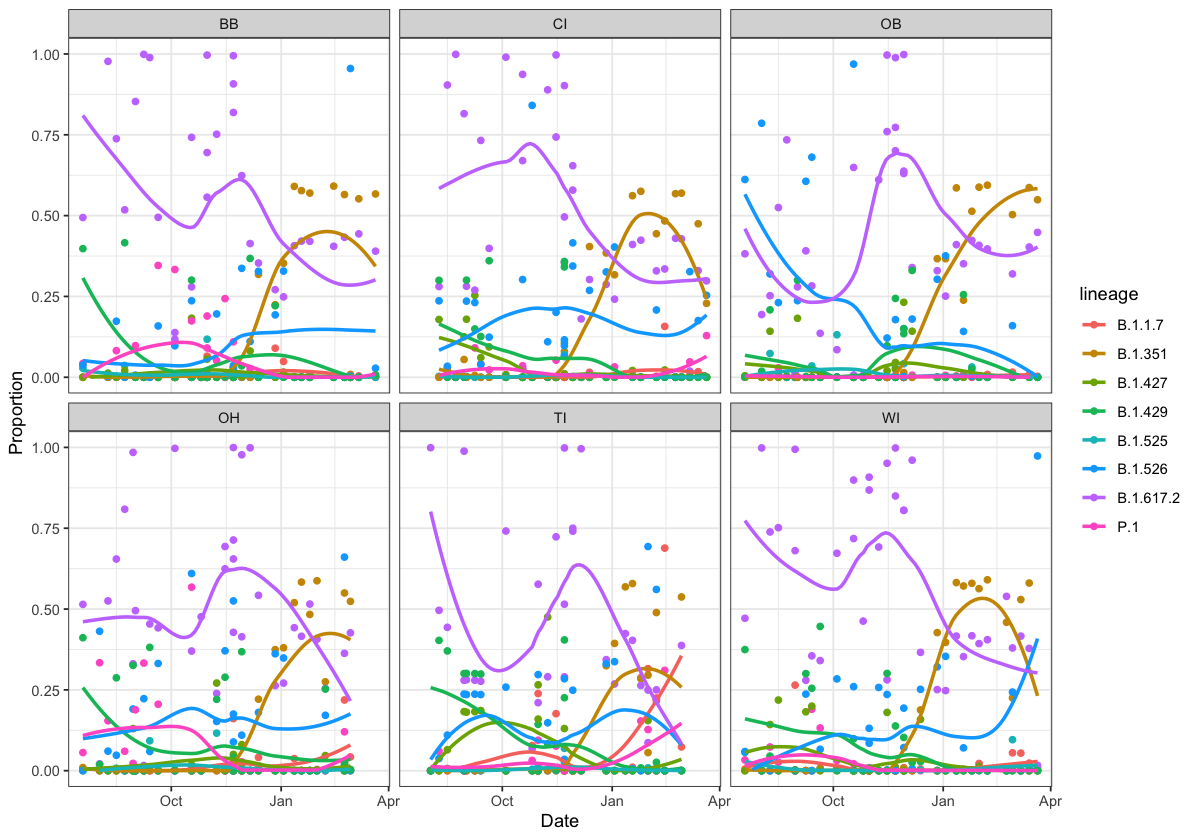

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
